In [1]:
import pandas as pd
import seaborn as sns

C:\Users\rosehyr\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rosehyr\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\rosehyr\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
print(data.head())
print(data.tail())
print(data.shape)

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  radio  newspaper  sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4
(200, 4)


C:\Users\rosehyr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


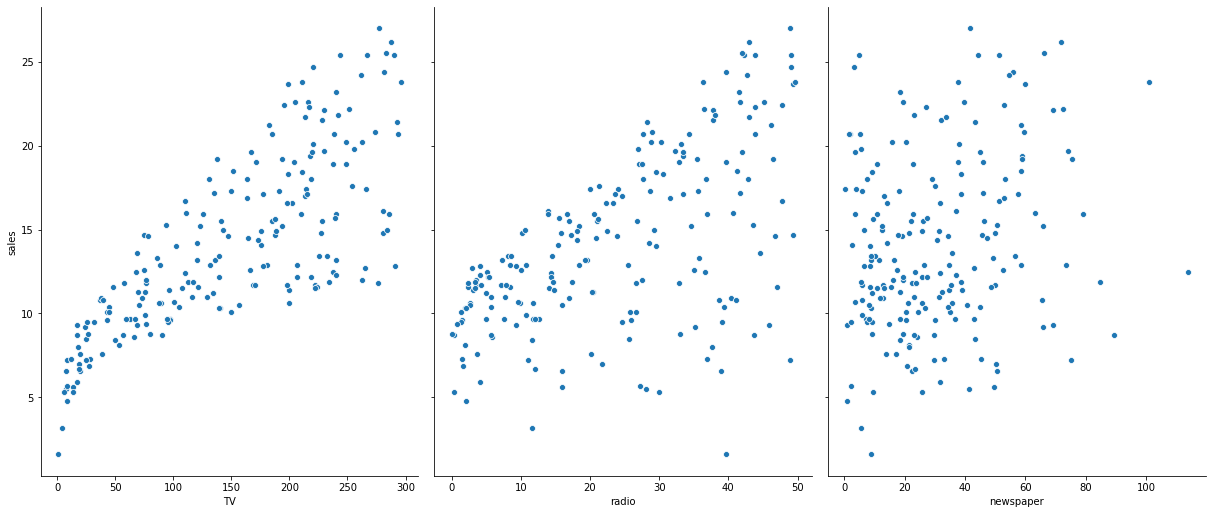

In [6]:
#分析数据
import matplotlib.pyplot as plt
# read csv file directly from a URL and save the results
data = pd.read_csv('./Advertising.csv', index_col=0)
# 使用散点图可视化特征与响应之间的关系
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8)
plt.show() #注意必须加上这一句，否则无法显示。

#选择'TV','radio','newspaper'作为特征，sales作为观测值
#用seaborn的pairplot函数绘制x的每一维度和对应Y的散点图

通过设置size和aspect参数来调节显示的大小和比例。可以从图中看出，TV特征和销量是有比较强的线性关系的，而Radio和Sales线性关系弱一些，Newspaper和Sales线性关系更弱。通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。

C:\Users\rosehyr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


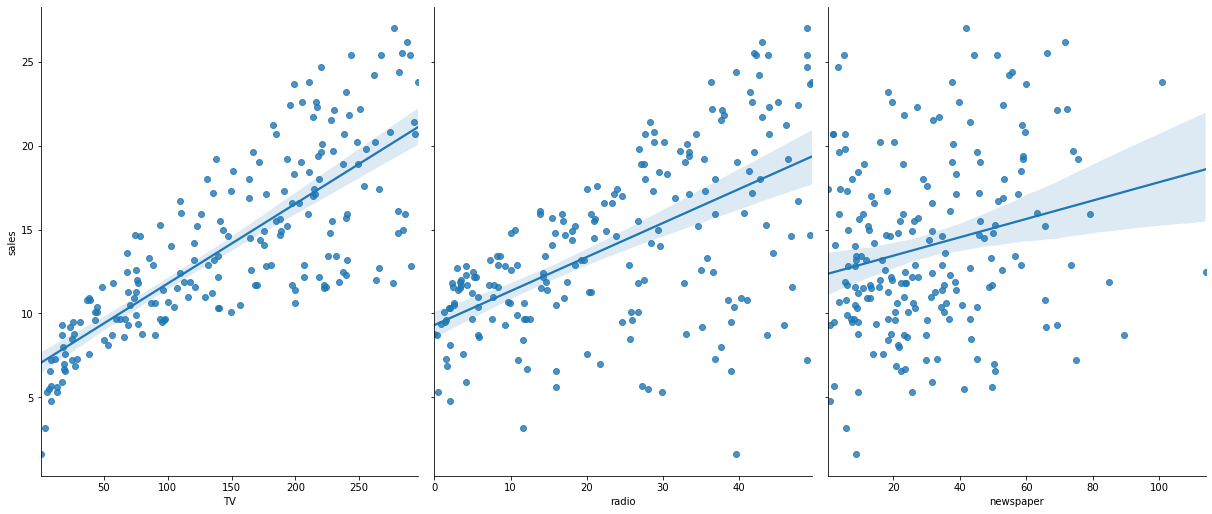

In [7]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')
plt.show()

In [8]:
#线性回归模型

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [10]:
#创建特征列表
feature_cols = ['TV', 'radio', 'newspaper']

In [11]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]

In [12]:
#使用列表选择原始DataFrame的子集
X = data[['TV', 'radio', 'newspaper']]

In [13]:
# 输出前五项数据
print(X.head())
print(type(X))
print(X.shape)

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [14]:
#从DataFrame中选择一个Series
y = data['sales']
y = data.sales


In [15]:
# 输出前五项数据
print(y.head())

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


In [16]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [17]:
#构建训练集和测试集，分别保存在X_train，y_train，Xtest，y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print (linreg.intercept_)
print (linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [19]:
# 将特征名称与系数对应
zip(feature_cols, linreg.coef_)

In [20]:
# 预测
y_pred = linreg.predict(X_test)
print(y_pred)
print(type(y_pred))

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]
<class 'numpy.ndarray'>


In [21]:
#计算Sales预测的RMSE  
print(type(y_pred),type(y_test))   
print(len(y_pred),len(y_test) )  
print(y_pred.shape,y_test.shape )  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(y_pred[i]-y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print("RMSE by hand:",sum_erro  ) 

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
50 50
(50,) (50,)
RMSE by hand: 1.4046514230328948


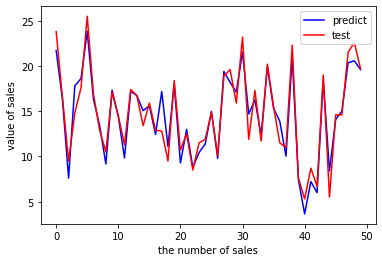

In [22]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.show()  